In [1]:
pip install pandas scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from scipy import stats

# Read the CSV file
df = pd.read_csv('train.csv')

In [3]:
import pandas as pd

print(df.head())

   PassengerId  Survived  Pclass                          Name   Sex   Age  \
0          272         1       3  Tornquist, Mr. William Henry  male  25.0   
1          379         0       3           Betros, Mr. Tannous  male  20.0   
2          278         0       2   Parkes, Mr. Francis "Frank"  male   NaN   
3          873         0       1      Carlsson, Mr. Frans Olof  male  33.0   
4          327         0       3     Nysveen, Mr. Johan Hansen  male  61.0   

   SibSp  Parch  Ticket    Fare        Cabin Embarked  
0      0      0    LINE  3.4000          NaN        S  
1      0      0    2648  4.0125          NaN        C  
2      0      0  239853  4.7000          NaN        S  
3      0      0     695  5.0000  B51 B53 B55        S  
4      0      0  345364  6.2375          NaN        S  


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
import pandas as pd
from statistics import mean, median, mode

data = df['Fare']

# Calculate Mean
mean_value = mean(data)

# Calculate Median
median_value = median(data)

# Calculate Mode
try:
    mode_value = mode(data)
except:
    mode_value = "No unique mode"

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")


Mean: 32.71611593714927
Median: 14.5
Mode: 8.05


In [6]:
sample_mean = data.mean()

# Calculate Sample Standard Deviation
sample_std_dev = data.std()

print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std_dev}")

Sample Mean: 32.71611593714929
Sample Standard Deviation: 49.61039681804129


In [7]:
Q1 = data.quantile(0.25)
Q2 = data.quantile(0.50)
Q3 = data.quantile(0.75)

In [8]:
IQR = Q3 - Q1

In [9]:
print(f"Q1: {Q1}")
print(f"Q2: {Q2}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

Q1: 7.925
Q2: 14.5
Q3: 31.275
IQR: 23.349999999999998


In [10]:
import matplotlib.pyplot as plt

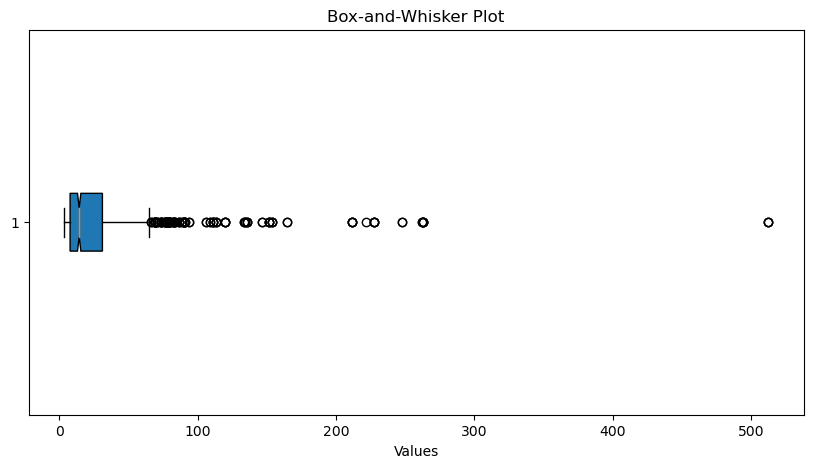

In [11]:
plt.figure(figsize=(10, 5))
plt.boxplot(data, vert=False, notch=True, patch_artist=True)
plt.title('Box-and-Whisker Plot')
plt.xlabel('Values')
plt.show()

In [12]:
frequency_table = data.value_counts().reset_index()
frequency_table.columns = ['Value', 'Frequency']

print(frequency_table)

       Value  Frequency
0     8.0500         43
1    13.0000         42
2     7.8958         38
3     7.7500         34
4    26.0000         31
..       ...        ...
255  14.1083          1
256  15.0000          1
257  15.0458          1
258  15.0500          1
259  21.6792          1

[260 rows x 2 columns]


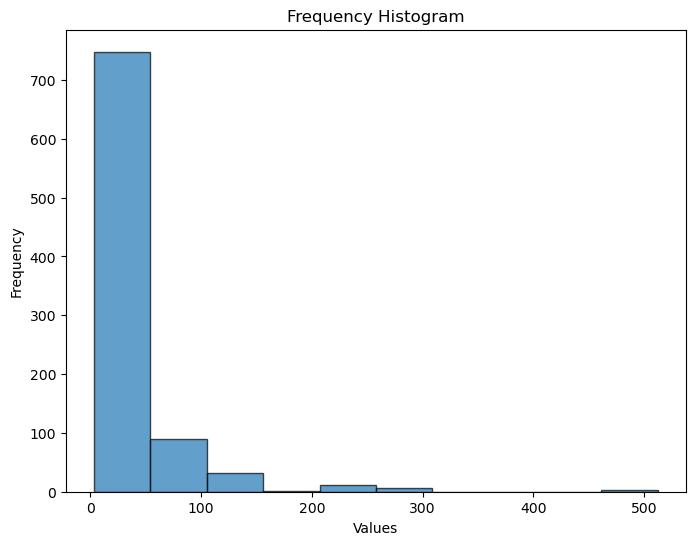

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(data, bins=10, edgecolor='black', alpha=0.7)
plt.title('Frequency Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [14]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Fare'], df['Ticket'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: \n{expected}")

Chi-squared statistic: 225819.0
P-value: 0.0
Degrees of freedom: 176120
Expected frequencies: 
[[0.003367   0.003367   0.00224467 ... 0.00112233 0.00112233 0.00224467]
 [0.003367   0.003367   0.00224467 ... 0.00112233 0.00112233 0.00224467]
 [0.003367   0.003367   0.00224467 ... 0.00112233 0.00112233 0.00224467]
 ...
 [0.00673401 0.00673401 0.00448934 ... 0.00224467 0.00224467 0.00448934]
 [0.01346801 0.01346801 0.00897868 ... 0.00448934 0.00448934 0.00897868]
 [0.01010101 0.01010101 0.00673401 ... 0.003367   0.003367   0.00673401]]


In [15]:
num_bins = 10  # You can change this value as needed

# Create the frequency table with class intervals
frequency_table = pd.cut(data, bins=num_bins, include_lowest=True, right=True, retbins=False)
frequency_table = pd.value_counts(frequency_table, sort=False).reset_index()
frequency_table.columns = ['Class Interval', 'Count']

# Calculate relative frequency
frequency_table['Relative Frequency'] = frequency_table['Count'] / len(data)

# Calculate cumulative relative frequency
frequency_table['Cumulative Relative Frequency'] = frequency_table['Relative Frequency'].cumsum()

# Print the tabular summary
print(frequency_table)


       Class Interval  Count  Relative Frequency  \
0      (2.89, 54.293]    748            0.839506   
1   (54.293, 105.186]     90            0.101010   
2  (105.186, 156.079]     31            0.034792   
3  (156.079, 206.972]      2            0.002245   
4  (206.972, 257.865]     11            0.012346   
5  (257.865, 308.758]      6            0.006734   
6   (308.758, 359.65]      0            0.000000   
7   (359.65, 410.543]      0            0.000000   
8  (410.543, 461.436]      0            0.000000   
9  (461.436, 512.329]      3            0.003367   

   Cumulative Relative Frequency  
0                       0.839506  
1                       0.940516  
2                       0.975309  
3                       0.977553  
4                       0.989899  
5                       0.996633  
6                       0.996633  
7                       0.996633  
8                       0.996633  
9                       1.000000  


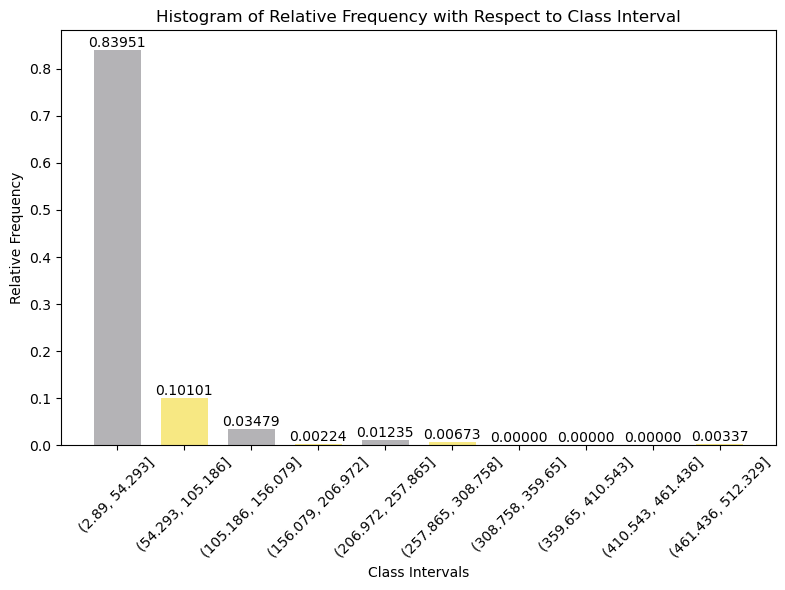

In [41]:
class_intervals = frequency_table['Class Interval'].astype(str)
relative_frequencies = frequency_table['Relative Frequency']

# Create the histogram
colors = ['#949398FF', '#F4DF4EFF']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(class_intervals, frequency_table['Relative Frequency'], width=0.7, align='center', alpha=0.7, color=colors)

# Loop through bars to add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.5f}', va='bottom', ha='center', color='black', fontsize=10)

# Set labels and title
plt.xlabel('Class Intervals')
plt.ylabel('Relative Frequency')
plt.title('Histogram of Relative Frequency with Respect to Class Interval')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

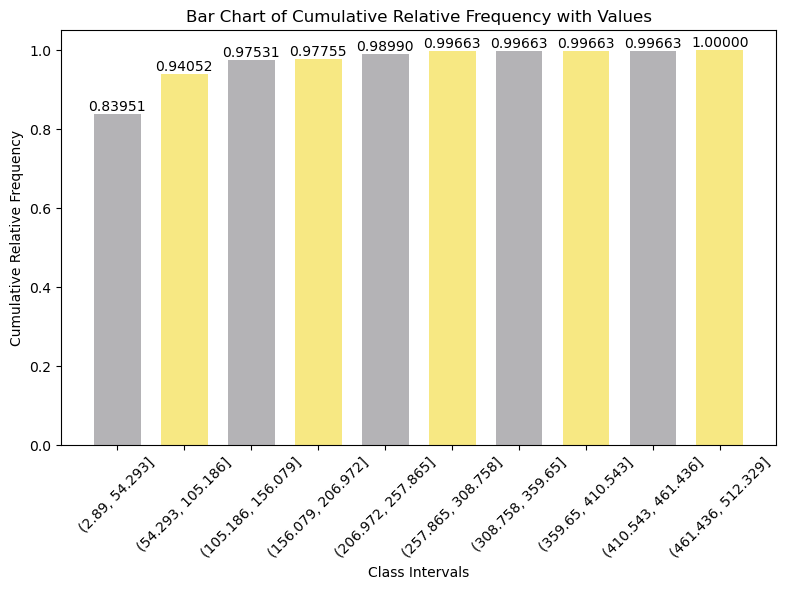

In [32]:
import matplotlib.pyplot as plt

# Assuming you have 'cumulative_relative_frequencies' as a list of cumulative relative frequencies

class_intervals = frequency_table['Class Interval'].astype(str)

# Generate a list of colors for the bars
colors = ['#949398FF', '#F4DF4EFF']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(class_intervals, frequency_table['Cumulative Relative Frequency'], width=0.7, align='center', alpha=0.7, color=colors)

# Add labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.5f}', va='bottom', ha='center', color='black', fontsize=10)

# Set labels and title
plt.xlabel('Class Intervals')
plt.ylabel('Cumulative Relative Frequency')
plt.title('Bar Chart of Cumulative Relative Frequency with Values')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
min_value = data.min()
max_value = data.max()

# Calculate the sample range
sample_range = max_value - min_value

print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Sample Range: {sample_range}")


Minimum Value: 3.4
Maximum Value: 512.3292
Sample Range: 508.92920000000004
